# 2. 데이터 분석

In [6]:
import pandas as pd

#폰트 디폴트 설정하면 좋은 것들
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'AppleGothic' #맥 설정
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False #한글 폰트 사용 시, 마이너스 글자가 꺠지는거 방지

In [45]:
# 월별 데이터프레임을 저장할 딕셔너리
dfs = {}

# 반복문을 통해 파일 읽기 및 처리
for i in range(1, 13):  # 1월부터 4월까지
    file_name = f'melon_chart_{i}month.csv'  # 파일 이름 생성
    df = pd.read_csv(file_name)  # 파일 읽기
    # 장르에서 쉼표 기준 첫 번째 값만 추출
    df['장르'] = df['장르'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) and ',' in x else x)
    # 데이터프레임 저장
    dfs[f'df{i}'] = df  # 딕셔너리에 저장

# 결과 확인
for name, df in dfs.items():
    print(f'{name} 데이터프레임:')
    print(df.head())  # 각 데이터프레임의 첫 5행 출력

df1 데이터프레임:
   순위             제목                  가수        장르
0   1         비의 랩소디                 임재현       발라드
1   2          To. X        태연 (TAEYEON)  R&B/Soul
2   3  Perfect Night  LE SSERAFIM (르세라핌)        댄스
3   4          Drama               aespa        댄스
4   5       헤어지자 말해요                 박재정       발라드
df2 데이터프레임:
   순위                제목            가수        장르
0   1     Love wins all           아이유       발라드
1   2             To. X  태연 (TAEYEON)  R&B/Soul
2   3            비의 랩소디           임재현       발라드
3   4  첫 만남은 계획대로 되지 않아     TWS (투어스)        댄스
4   5          Love 119         RIIZE        댄스
df3 데이터프레임:
   순위                제목                  가수        장르
0   1               밤양갱           비비 (BIBI)  R&B/Soul
1   2  첫 만남은 계획대로 되지 않아           TWS (투어스)        댄스
2   3   나는 아픈 건 딱 질색이니까             (여자)아이들        댄스
3   4     Love wins all                 아이유       발라드
4   5              EASY  LE SSERAFIM (르세라핌)      랩/힙합
df4 데이터프레임:
   순위                제목          가

In [19]:
df4.groupby('장르').size()

장르
POP          5
R&B/Soul     3
댄스          39
랩/힙합         4
록/메탈         9
발라드         36
성인가요/트로트     1
인디음악         2
포크/블루스       1
dtype: int64

# 3. 데이터 시각화

In [13]:
df.groupby('장르')

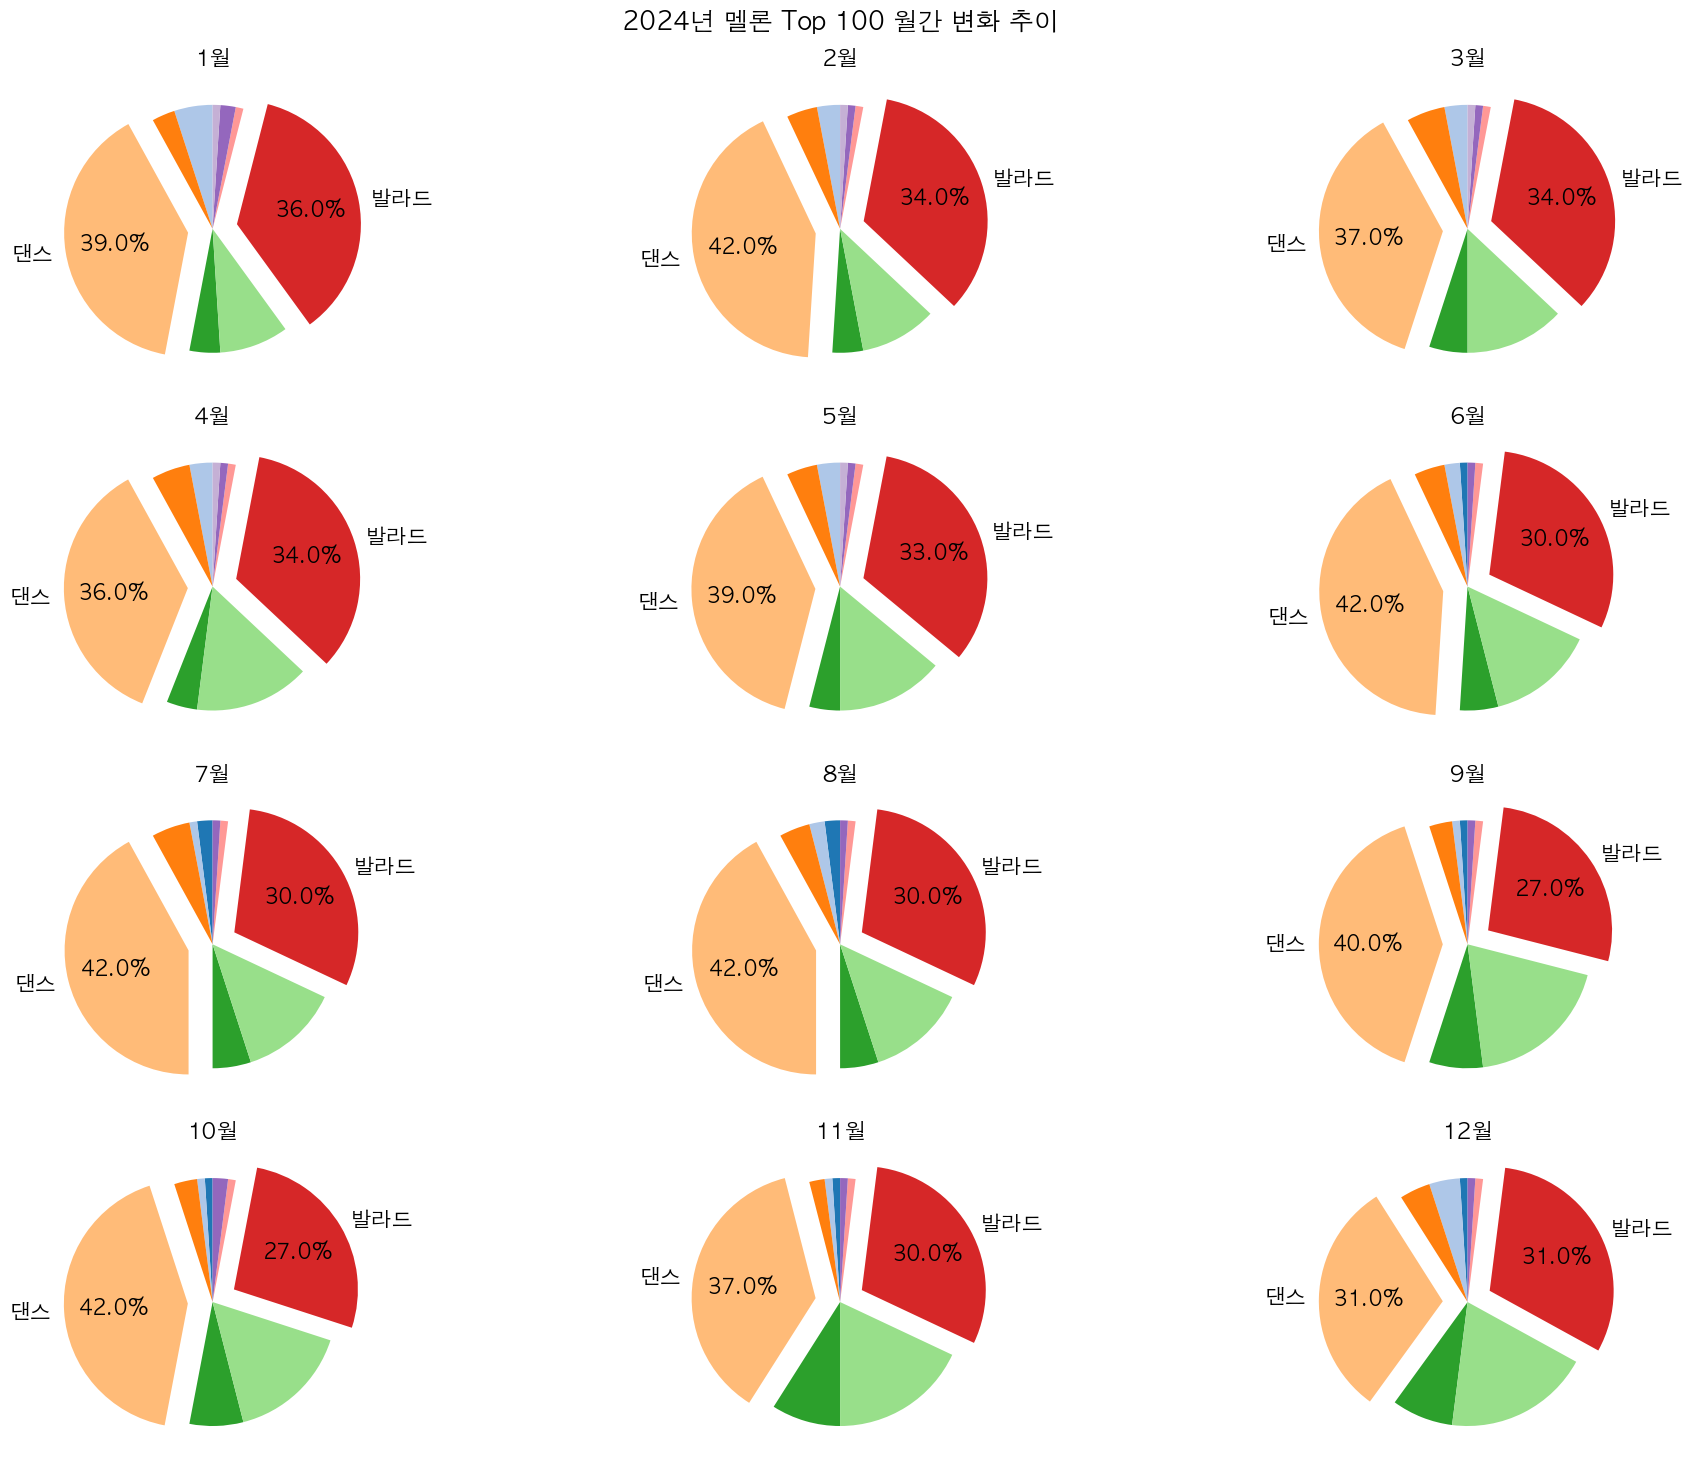

In [57]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))  # 4x3 배열로 플롯 생성
fig.suptitle('2024년 멜론 Top 100 월간 변화 추이')

# 고정된 색상 팔레트
unique_labels = sorted(set().union(*[df['장르'].unique() for df in dfs.values()]))
color_map = {label: color for label, color in zip(unique_labels, plt.cm.tab20.colors)}

# 20% 미만의 비율을 라벨에서 제외하는 함수
def custom_labels(pcts, labels):
    return [label if pct >= 20 else '' for pct, label in zip(pcts, labels)]

# 20% 미만의 비율을 라벨에서 제외하는 함수
def custom_autopct(pct):
    return ('%.1f%%' % pct) if pct >= 20 else ''

# 반복문을 통해 파이 차트 생성
for idx, (name, df) in enumerate(dfs.items()):  # 딕셔너리의 키, 데이터프레임 순회
    genre_counts = df.groupby('장르').size()
    labels = genre_counts.index
    pcts = (genre_counts / genre_counts.sum()) * 100

    # 20% 이상만 explode 설정
    explode = [0.2 if pct >= 20 else 0 for pct in pcts]

    # 서브플롯 위치 계산
    row, col = divmod(idx, 3)  # 4x3 배열에서 행, 열 계산

    # 파이 차트 생성
    axs[row, col].pie(
        genre_counts, 
        labels=custom_labels(pcts, labels), 
        autopct=custom_autopct, 
        startangle=90, 
        explode=explode,
        colors=[color_map[label] for label in labels]  # 고정된 색상 사용
    )

    # 서브플롯 제목 설정
    axs[row, col].set_title(f'{idx + 1}월', fontsize=16)

# 전체 레이아웃 정리
plt.tight_layout()

plt.savefig('2024년 멜론 Top 100 월간 변화 추이.png', dpi = 1000)

plt.show()